In [2]:
import torch
from transformers import AutoConfig, AutoModelForCausalLM

model_id = "stanfordnlp/backpack-gpt2"
config = AutoConfig.from_pretrained(model_id, trust_remote_code=True)
torch_model = AutoModelForCausalLM.from_pretrained(model_id, config=config, trust_remote_code=True)
torch_model.eval()

input = torch.randint(0, 50264, (1, 512), dtype=torch.long)
torch_out = torch_model(
    input,
    position_ids=None,
)
torch_out = torch.nn.functional.softmax(torch_out.logits, dim=-1)
print(torch_out)


config.json:   0%|          | 0.00/952 [00:00<?, ?B/s]

configuration_backpack_gpt2.py:   0%|          | 0.00/1.66k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/stanfordnlp/backpack-gpt2:
- configuration_backpack_gpt2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_backpack_gpt2.py:   0%|          | 0.00/8.49k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/stanfordnlp/backpack-gpt2:
- modeling_backpack_gpt2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


pytorch_model.bin:   0%|          | 0.00/684M [00:00<?, ?B/s]

tensor([[[6.1207e-06, 4.4030e-05, 1.8751e-07,  ..., 2.7556e-11,
          2.6806e-11, 3.2911e-11],
         [5.2419e-05, 2.6140e-03, 6.0980e-06,  ..., 3.4490e-11,
          4.3596e-11, 5.6293e-11],
         [5.0698e-05, 3.7924e-05, 4.4695e-06,  ..., 1.3860e-11,
          1.0285e-11, 7.0947e-12],
         ...,
         [2.8516e-03, 3.9949e-03, 2.8035e-05,  ..., 4.5435e-10,
          4.2290e-10, 3.7005e-10],
         [2.2292e-03, 2.5751e-03, 1.8474e-05,  ..., 2.3710e-10,
          2.7030e-10, 2.2387e-10],
         [2.1343e-03, 3.7733e-03, 2.1047e-05,  ..., 3.3357e-10,
          3.4452e-10, 2.8121e-10]]], grad_fn=<SoftmaxBackward0>)


In [13]:
len(input), len(input[0]), input[0][0]

(1, 512, tensor(27518))

In [4]:
from transformers import GPT2Tokenizer

# Initialize the GPT-2 tokenizer
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

# Input sentence
sentence = "I love science, that is why I joined his lab."

# Tokenize the sentence
tokens = tokenizer.tokenize(sentence)
token_ids = tokenizer.convert_tokens_to_ids(tokens)

# Display the tokens and their corresponding IDs
print("Tokens:", tokens)
print("Token IDs:", token_ids)

Tokens: ['I', 'Ġlove', 'Ġscience', ',', 'Ġthat', 'Ġis', 'Ġwhy', 'ĠI', 'Ġjoined', 'Ġhis', 'Ġlab', '.']
Token IDs: [40, 1842, 3783, 11, 326, 318, 1521, 314, 5399, 465, 2248, 13]


In [17]:
import torch
# Define the given list
new_input = [40, 1842, 3783, 11, 326, 318, 1521, 314, 5399, 465, 2248, 13]
# Create a tensor of shape (1, 512) and fill it with zeros (padding value)
updated_input = torch.zeros((1, 512), dtype=torch.long)
# Populate the tensor with the values from new_input
updated_input[0, :len(new_input)] = torch.tensor(new_input, dtype=torch.long)
# Print the updated tensor
len(updated_input), updated_input[0][0:20]

(1,
 tensor([  40, 1842, 3783,   11,  326,  318, 1521,  314, 5399,  465, 2248,   13,
            0,    0,    0,    0,    0,    0,    0,    0]))

In [20]:
torch_out = torch_model(
    updated_input,
    position_ids=None,
)
final_out = torch.nn.functional.softmax(torch_out.logits, dim=-1)

In [21]:
# torch_out["sense_network"]

KeyError: 'sense_network'

In [23]:
def hook_fn(module, inputs, outputs):
    global sense_network_outputs
    sense_network_outputs = outputs

# Register the hook
hook = torch_model.backpack.sense_network.register_forward_hook(hook_fn)

# Run a forward pass
outputs = torch_model(updated_input, position_ids=None)

# The `sense_network_outputs` variable now contains the outputs
print(sense_network_outputs)

# Clean up hook after usage
hook.remove()

tensor([[[[-0.4535, -0.1363, -0.9129,  ..., -0.2406,  0.2728, -0.1401],
          [-0.9058,  0.3228,  0.3383,  ...,  1.7340, -0.6586, -0.6071],
          [-0.1920, -0.6758, -0.9511,  ..., -0.8554, -0.5013,  0.0423],
          ...,
          [ 0.0299, -1.0315, -0.0941,  ..., -0.2931, -0.5787, -0.3081],
          [ 0.0299, -1.0315, -0.0941,  ..., -0.2931, -0.5787, -0.3081],
          [ 0.0299, -1.0315, -0.0941,  ..., -0.2931, -0.5787, -0.3081]],

         [[-2.1295, -0.0051,  0.6264,  ..., -1.3281, -0.7048,  0.7831],
          [-0.7071,  0.2625, -1.5539,  ..., -1.8542,  0.8231,  0.0373],
          [-1.9968,  1.0323, -0.7149,  ...,  0.5350,  1.1121, -0.5267],
          ...,
          [ 0.8662,  0.8879,  0.2343,  ...,  0.5282,  0.3733, -1.0415],
          [ 0.8662,  0.8879,  0.2343,  ...,  0.5282,  0.3733, -1.0415],
          [ 0.8662,  0.8879,  0.2343,  ...,  0.5282,  0.3733, -1.0415]],

         [[ 0.5613, -0.2969, -0.3309,  ...,  0.1192,  0.0290,  0.1267],
          [ 0.1330, -1.1857,  

In [24]:
sense_network_outputs.shape

torch.Size([1, 16, 512, 768])

In [26]:
## contains batch_size: 1 -> 16 sense vectors of dim. 768 for 512 tokens.
## get length and average.
len(sense_network_outputs[0][0][0]), sense_network_outputs[0][0][0].mean()

(768, tensor(0.0122, grad_fn=<MeanBackward0>))

In [27]:
len(token_ids), tokens

(12,
 ['I',
  'Ġlove',
  'Ġscience',
  ',',
  'Ġthat',
  'Ġis',
  'Ġwhy',
  'ĠI',
  'Ġjoined',
  'Ġhis',
  'Ġlab',
  '.'])

In [72]:
## go for tokens - science (2) and lab (10)
def check_for_sparsity(threshold = 100, sparsity_ratio_threshold = 0.7):
  ## check if vector is sparse.
  ## Input:
  ## A vector of 'd' dimensions.
  ## Steps:
  ## 0. Make dims where |val| < thresh as 0.
  ## 1. Take the sum of vectors.
  ## 2. Check if sparsity_ratio is lower than reuqired.
  ## make
  new_vector = vector.clone()
  new_vector[torch.abs(new_vector) < threshold] = 0
  near_zero_count = (new_vector == 0).sum().item()
  # print(near_zero_count)
  sparsity_ratio = near_zero_count / vector.numel()
  # print(vector.numel(), sparsity_ratio)
  return sparsity_ratio > sparsity_ratio_threshold

In [73]:
print(sense_network_outputs[0][0][0][0])

tensor(-0.4535, grad_fn=<SelectBackward0>)


In [74]:
## threshold == mean of all dims (in abs) - standard deviation
abs_solute = sense_network_outputs.abs()
print(abs_solute.mean(), abs_solute.std())

tensor(0.5520, grad_fn=<MeanBackward0>) tensor(0.4686, grad_fn=<StdBackward0>)


In [77]:
for token_pos in [2, 10]:
  for sense_pos in range(16):
    vector = sense_network_outputs[0][sense_pos][token_pos]
    val = check_for_sparsity(threshold = 0.15, sparsity_ratio_threshold = 0.7)
    print(token_pos, sense_pos, val)

2 0 False
2 1 False
2 2 False
2 3 False
2 4 False
2 5 False
2 6 False
2 7 False
2 8 False
2 9 False
2 10 False
2 11 False
2 12 False
2 13 False
2 14 False
2 15 False
10 0 False
10 1 False
10 2 False
10 3 False
10 4 False
10 5 False
10 6 False
10 7 False
10 8 False
10 9 False
10 10 False
10 11 False
10 12 False
10 13 False
10 14 False
10 15 False


In [90]:
average_vals = [[], []]
for idx, token_pos in enumerate([2, 10]):
  for sense_pos in range(16):
    vector = sense_network_outputs[0][sense_pos][token_pos]
    av_val = vector.mean().item()
    average_vals[idx].append(av_val)

print(average_vals[0])

[0.001745332614518702, 0.0019802041351795197, 0.006546262186020613, 0.018736591562628746, 0.05626751109957695, 0.063356913626194, -0.005700367968529463, -0.02715846337378025, 0.0008958019316196442, -0.00628401106223464, 0.027646489441394806, -0.04597896337509155, -0.03282975032925606, 0.021510928869247437, -0.0850180983543396, 0.0007544234395027161]


In [91]:
print(average_vals[1])

[0.050200119614601135, -0.025606269016861916, -0.009474766440689564, 0.03669930621981621, -0.005756206810474396, -0.05828329548239708, 0.06364165991544724, -0.06766702234745026, 0.029389282688498497, 0.05928298830986023, -0.030635720118880272, -0.002967898966744542, -0.05243270471692085, 0.003937933128327131, 0.022309457883238792, 0.009041309356689453]


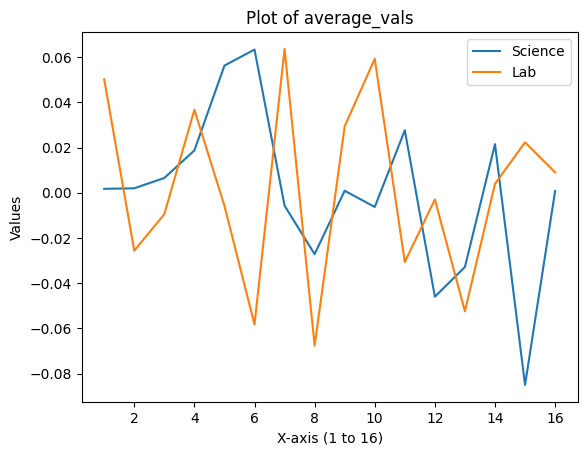

In [93]:
import matplotlib.pyplot as plt

# Plotting the two datasets
plt.plot(range(1, 17), average_vals[0], label='Science')
plt.plot(range(1, 17), average_vals[1], label='Lab')

# Adding a legend
plt.legend()

# Adding labels and title
plt.xlabel('X-axis (1 to 16)')
plt.ylabel('Values')
plt.title('Plot of average_vals')

# Show the plot
plt.show()

In [84]:
## find KL-divergence.

import numpy as np
from scipy.stats import entropy

set1_hist, bin_edges = np.histogram(average_vals[0], bins=10, density=True)
set2_hist, bin_edges = np.histogram(average_vals[1], bins=10, density=True)

kl_divergence = entropy(set1_hist, set2_hist)

print("KL Divergence:", kl_divergence)

KL Divergence: 0.541944704605531


In [86]:
set1_hist

array([ 4.21229958,  0.        ,  4.21229958,  8.42459915,  0.        ,
       25.27379745,  8.42459915,  8.42459915,  0.        ,  8.42459915])

In [87]:
set2_hist

array([ 9.5195533 ,  4.75977665,  4.75977665,  4.75977665, 14.27932996,
        9.5195533 ,  4.75977665,  9.5195533 ,  4.75977665,  9.5195533 ])